In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("train.csv")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
group = []
index = []
maxIndex = []

for i in df['PassengerId']:
    group.append(i[0:4]) # gggg:그룹 식별자로 첫 네 문자 추출
    index.append(i[5:]) # pp: 다섯 번째 위치부터의 문자를 색인으로 사용

df['Group'] = group
df['Index'] = index
df['maxIndex'] = '01' # 'maxIndex' 열을 생성하고 초기값을 '01'로 설정

# '그룹'이 동일한 경우 'maxIndex' 값을 마지막 'Index' 값으로 변경
for unique_group in df['Group'].unique():
    group_indices = df[df['Group'] == unique_group].index
    last_index_in_group = group_indices[-1]
    df.loc[group_indices, 'maxIndex'] = df.at[last_index_in_group, 'Index']

In [6]:
df['maxIndex'].unique() # 최대 8명으로 이루어진 그룹까지 있는 것 확인

array(['01', '02', '03', '06', '04', '07', '05', '08'], dtype=object)

In [7]:
df['maxIndex'].value_counts() # 그룹 인원수별 분포 확인

01    4805
02    1682
03    1020
04     412
05     265
07     231
06     174
08     104
Name: maxIndex, dtype: int64

In [8]:
df[['Transported', 'maxIndex']].groupby('maxIndex').mean().sort_values(by = 'Transported', ascending = False)
# 그룹 인원수별 생존률 확인

,Transported
maxIndex,
04,0.640777
06,0.614943
03,0.593137
05,0.592453
07,0.541126
02,0.538050
01,0.452445
08,0.394231


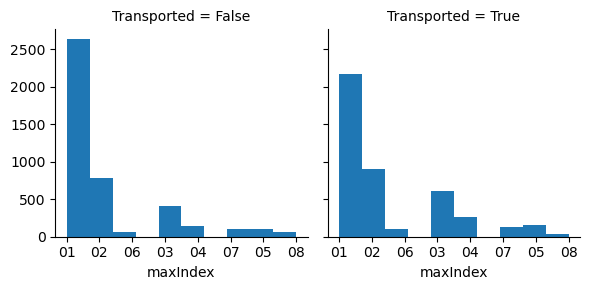

In [9]:
g1 = sns.FacetGrid(df, col = 'Transported')
g1.map(plt.hist, 'maxIndex')

Text(0.5, 1.0, 'maxIndex: Transported or not')

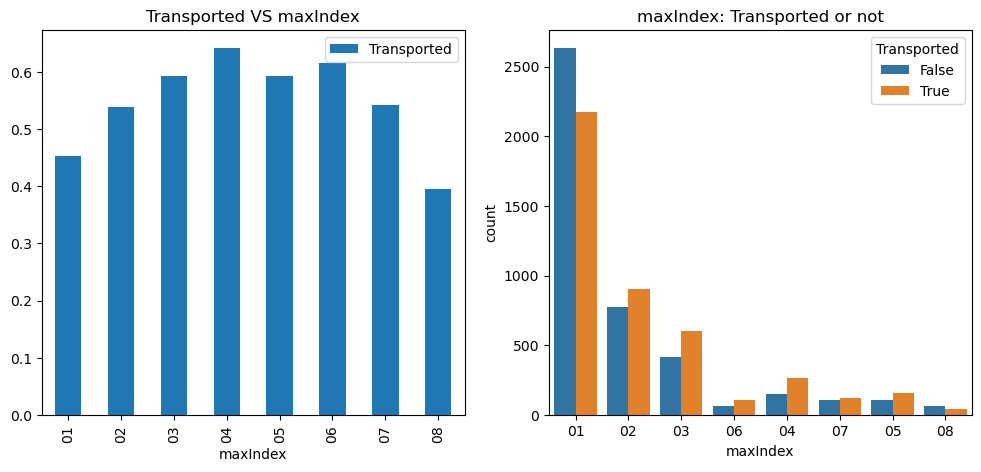

In [10]:
f, ax = plt.subplots(1,2,figsize=(12,5))

# subplots() 함수는 여러 개의 그래프를 하나의 그림에
# f: 전체 subplot, ax: 낱개의 subplot
# subplots(nrows, ncols, index)

df[['maxIndex', 'Transported']].groupby(['maxIndex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Transported VS maxIndex')
sns.countplot(x = 'maxIndex', hue = 'Transported', data = df, ax = ax[1])
ax[1].set_title('maxIndex: Transported or not')

# 그룹 내 사람 수와 transported 사이의 관계

### 첫 번째 그래프
- 8명으로 구성된 그룹의 transported 수치가 낮다 > 구조 상황에서 유리한 위치 선점

### 두 번째 그래프
- 그렇게 의미 있어 보이진...않는 듯

# HomePlanet

In [11]:
# 각 그룹의 인원 수를 계산
group_sizes = df.groupby('HomePlanet').size()

# 생존률 계산 및 정렬
homeplanet_missing = df.groupby('HomePlanet')['Transported'].mean().sort_values()
print(homeplanet_missing)

HomePlanet
Earth     0.423946
Mars      0.523024
Europa    0.658846
Name: Transported, dtype: float64


In [12]:
mode_value = df['HomePlanet'].mode()[0]
df['HomePlanet'].fillna(mode_value, inplace=True)
# 지구가 최빈값

In [13]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Group             0
Index             0
maxIndex          0
dtype: int64

In [14]:
print(homeplanet_missing) #최빈값으로 채워도 큰 변동 x

HomePlanet
Earth     0.423946
Mars      0.523024
Europa    0.658846
Name: Transported, dtype: float64


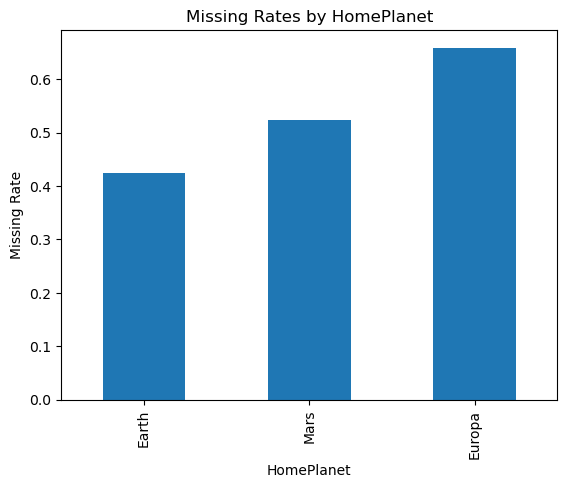

In [15]:
homeplanet_missing.plot(kind='bar')
plt.title("Missing Rates by HomePlanet")
plt.ylabel("Missing Rate")
plt.show()

# VIP

In [16]:
vip_missing = df.groupby('VIP')['Transported'].mean()
print(vip_missing)

VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64


In [17]:
services = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for service in services:    
    df[service].fillna(df.groupby("VIP")[service].transform("mean"), inplace = True)
# VIP인지 아닌지에 따라 각종 서비스에 소비하는 금액 차이도 있을 것 -> 각각의 평균을 서비스 결측치에 대입

In [18]:
df.isnull().sum()    # 여전히 비어 있는 services들은 VIP 값도 비어 있을 거라고 예상

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       4
FoodCourt         4
ShoppingMall      4
Spa               2
VRDeck            1
Name            200
Transported       0
Group             0
Index             0
maxIndex          0
dtype: int64

In [19]:
df[df.RoomService.isna()] # 윗셀 가정 확인

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Index,maxIndex
646,0679_01,Earth,False,G/104/S,TRAPPIST-1e,20.0,NaN,NaN,215.0,0.0,541.0,0.0,Vana Nichoan,False,0679,01,01
1084,1150_01,Earth,True,G/179/S,55 Cancri e,16.0,NaN,NaN,0.0,0.0,0.0,0.0,Dona Brookes,False,1150,01,01
3287,3531_02,Mars,True,F/731/P,TRAPPIST-1e,45.0,NaN,NaN,0.0,0.0,0.0,0.0,Cinda Erflé,True,3531,02,02
3869,4149_01,Earth,False,G/682/P,55 Cancri e,33.0,NaN,NaN,0.0,589.0,2.0,255.0,Benew Saundez,True,4149,01,01


In [20]:
price = df.groupby("VIP")[services].mean()
price

# vip인 그룹과 아닌 그룹의 소비금액 차이 확인

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,
False,217.218527,426.336536,173.876298,301.711045,282.718056
True,473.615385,1811.393782,247.726804,760.710660,1234.856410


In [21]:
for i in df.index:
    if pd.isna(df['VIP'][i]):  # 'VIP' 열이 결측치인 경우에만 실행
        is_vip = False  # 각 행에 대해 'is_vip' 플래그를 False로 초기화
        for service in services:
            if df[service][i] >= price[service][1]:
                is_vip = True  # 각 서비스 이용금액이 vip 고객들의 이용금액의 기준치(평균) 이상이라면
                break
        df.at[i, 'VIP'] = is_vip

df['VIP'].fillna(False, inplace=True)

In [22]:
df[df.RoomService.isna()] # vip 열 값 올바로 채워졌는지 확인

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Index,maxIndex
646,0679_01,Earth,False,G/104/S,TRAPPIST-1e,20.0,False,NaN,215.0,0.0,541.0,0.0,Vana Nichoan,False,0679,01,01
1084,1150_01,Earth,True,G/179/S,55 Cancri e,16.0,False,NaN,0.0,0.0,0.0,0.0,Dona Brookes,False,1150,01,01
3287,3531_02,Mars,True,F/731/P,TRAPPIST-1e,45.0,False,NaN,0.0,0.0,0.0,0.0,Cinda Erflé,True,3531,02,02
3869,4149_01,Earth,False,G/682/P,55 Cancri e,33.0,True,NaN,0.0,589.0,2.0,255.0,Benew Saundez,True,4149,01,01


In [23]:
vip_missing = df.groupby('VIP')['Transported'].mean()
print(vip_missing) # 변동 조금?

VIP
False    0.508197
True     0.363636
Name: Transported, dtype: float64


In [24]:
df = df.drop(labels = services, axis = 1)

# services에 해당하는 레이블들은 vip 열 값을 채우기 위해 필요했던 값들 > 지워도 무방

In [25]:
df.isnull().sum() # 지워진 것 확인

PassengerId      0
HomePlanet       0
CryoSleep      217
Cabin          199
Destination    182
Age            179
VIP              0
Name           200
Transported      0
Group            0
Index            0
maxIndex         0
dtype: int64

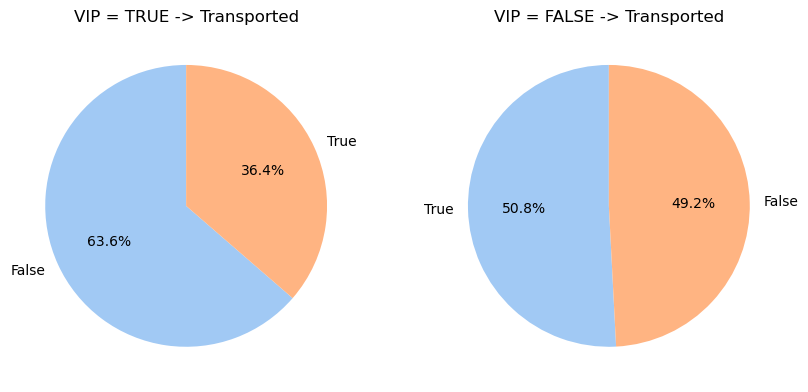

In [26]:
vip_true_counts = df[df['VIP'] == True]['Transported'].value_counts()
labels_true = vip_true_counts.index
sizes_true = vip_true_counts.values

# VIP 변수가 FALSE인 경우의 Transported 비율
vip_false_counts = df[df['VIP'] == False]['Transported'].value_counts()
labels_false = vip_false_counts.index
sizes_false = vip_false_counts.values

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# VIP 변수가 TRUE인 경우의 원그래프
axes[0].pie(sizes_true, labels=labels_true, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('VIP = TRUE -> Transported')

# VIP 변수가 FALSE인 경우의 원그래프
axes[1].pie(sizes_false, labels=labels_false, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('VIP = FALSE -> Transported')

# 그래프 표시
plt.show()

# CryoSleep

In [27]:
# 감금여부 결측치 채우기 > vip라면 감금률 낮을까? (낮다면 vip인 사람들은 감금x, 아닌 사람들은 감금 ㅇ로 처리하고자)

cryo_array = np.array([df.CryoSleep], dtype = str)
cryo_true = np.where(cryo_array == 'True')[0]
cryo_false = np.where(cryo_array == 'False')[0]
cryo_true_count = len(cryo_array[cryo_true])
cryo_false_count = len(cryo_array[cryo_false])

print(f'number of people who were imprisoned: {cryo_true_count} \nnumber of people who were not imprisoned: {cryo_false_count}')

# 감금 비율 확인

number of people who were imprisoned: 3037 
number of people who were not imprisoned: 5439


In [28]:
cryo_values = df['CryoSleep'].unique()

cryosleep_missing = np.array([
    np.mean(df.loc[df['CryoSleep'] == value, 'Transported']) for value in cryo_values
])

for value, mean in zip(cryo_values, cryosleep_missing):
    print(f"CryoSleep: {value}, Mean Transported: {mean}")
    
# 감금이 됐으면 생존률이 낮을 것이란 추측 증명

CryoSleep: False, Mean Transported: 0.3289207574921861
CryoSleep: True, Mean Transported: 0.8175831412578202
CryoSleep: nan, Mean Transported: nan


In [29]:
df[df.CryoSleep.isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Group,Index,maxIndex
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,Thewis Connelson,True,0099,02,02
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,Carry Cleachrand,False,0105,01,01
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,Aldeba Bootious,False,0110,02,04
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,Rohs Pead,True,0115,01,01
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,Hilip Grifford,True,0173,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,Bellus Platch,True,9197,01,04
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,Hard Hinglendez,False,9227,05,05
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,NaN,True,9246,01,01
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,Annah Gilleyons,True,9259,01,01


In [30]:
df[['CryoSleep', 'VIP']].groupby('VIP').mean().sort_values(by = 'CryoSleep')

# 가정 맞음 > CryoSleep의 결측치는 vip 기준으로 채우겠다

,CryoSleep
VIP,
True,0.078067
False,0.367491


In [31]:
for i in df.index:
    if pd.isna(df['CryoSleep'][i]):  # CryoSleep 열이 결측치인 경우에만 실행
        is_cryosleep = False 
        for j in df.index:
            if df['VIP'][j] != 'True':
                is_cryosleep = True 
                break
        df.at[i, 'CryoSleep'] = is_cryosleep 

In [32]:
df.loc[[92,98,104,111]]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Group,Index,maxIndex
92,0099_02,Earth,True,G/12/P,TRAPPIST-1e,2.0,False,Thewis Connelson,True,0099,02,02
98,0105_01,Earth,True,F/21/P,TRAPPIST-1e,27.0,False,Carry Cleachrand,False,0105,01,01
104,0110_02,Europa,True,B/5/P,TRAPPIST-1e,40.0,False,Aldeba Bootious,False,0110,02,04
111,0115_01,Mars,True,F/24/P,TRAPPIST-1e,26.0,False,Rohs Pead,True,0115,01,01


In [33]:
df[['CryoSleep', 'VIP']].groupby('VIP').mean().sort_values(by = 'CryoSleep')

# 큰 변동 x 

,CryoSleep
VIP,
True,0.098182
False,0.383345


In [34]:
df[['CryoSleep', 'Transported']].groupby('CryoSleep').mean().sort_values(by = 'Transported')

,Transported
CryoSleep,
False,0.328921
True,0.795636


In [35]:
print(cryosleep_missing)

[0.32892076 0.81758314        nan]


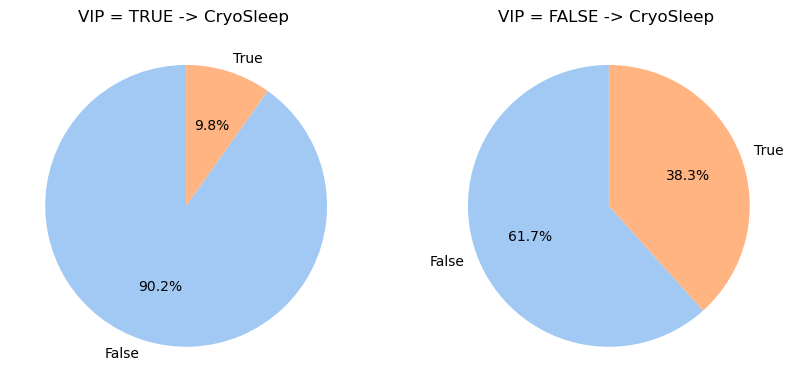

In [36]:
vip_true_counts = df[df['VIP'] == True]['CryoSleep'].value_counts()
labels_true = vip_true_counts.index
sizes_true = vip_true_counts.values

# VIP 변수가 FALSE인 경우의 CryoSleep 비율
vip_false_counts = df[df['VIP'] == False]['CryoSleep'].value_counts()
labels_false = vip_false_counts.index
sizes_false = vip_false_counts.values

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# VIP 변수가 TRUE인 경우의 원그래프
axes[0].pie(sizes_true, labels=labels_true, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('VIP = TRUE -> CryoSleep ')

# VIP 변수가 FALSE인 경우의 원그래프
axes[1].pie(sizes_false, labels=labels_false, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('VIP = FALSE -> CryoSleep ')

plt.show()

# Cabin

In [37]:
df.Cabin.isnull().sum()

199

In [38]:
df[df.Cabin.isna()].index

Int64Index([  15,   93,  103,  222,  227,  251,  260,  272,  280,  295,
            ...
            8043, 8066, 8110, 8168, 8202, 8209, 8475, 8485, 8509, 8656],
           dtype='int64', length=199)

In [39]:
df.loc[103]

PassengerId              0110_01
HomePlanet                Europa
CryoSleep                  False
Cabin                        NaN
Destination          TRAPPIST-1e
Age                         32.0
VIP                        False
Name           Graviph Aloubtled
Transported                False
Group                       0110
Index                         01
maxIndex                      04
Name: 103, dtype: object

In [40]:
# cabin 열의 결측치의 경우, 같은 그룹에 속한 사람들이 같은 곳에서 묵을 것
for i in df[df.Cabin.isna()].index:
    maxIndex = int(df.maxIndex[i])
    if maxIndex >= 2:
        group = df.Group[i]
        ndf = df[-df.Cabin.isna()]
        cabin = ndf[group == ndf['Group']].Cabin.mode()
        df.at[i, 'Cabin'] = cabin[0]
    else:
        continue

In [41]:
df.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin           99
Destination    182
Age            179
VIP              0
Name           200
Transported      0
Group            0
Index            0
maxIndex         0
dtype: int64

In [42]:
df['Deck'] = 0
df['Side'] = 0

for i in df[df.Cabin.isna()].index:
    df.Deck[i] = np.nan
    df.Side[i] = np.nan
for i in df[-df.Cabin.isna()].index:
    cont = str(df.Cabin[i])
    df.Deck[i] = cont[0]
    df.Side[i] = cont[-1]

/var/folders/v1/3q6w8yln7rlf27jz14stsjxc0000gn/T/ipykernel_1420/328525163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Deck[i] = np.nan
/var/folders/v1/3q6w8yln7rlf27jz14stsjxc0000gn/T/ipykernel_1420/328525163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Side[i] = np.nan
/var/folders/v1/3q6w8yln7rlf27jz14stsjxc0000gn/T/ipykernel_1420/328525163.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Deck[i] = cont[0]


In [43]:
df['Deck'].value_counts()
# 갑판별 승객 수 확인 > 99개 결측치 F에 할당하자

F    2810
G    2588
E     885
B     796
C     761
D     487
A     262
T       5
Name: Deck, dtype: int64

In [44]:
df['Side'].value_counts()
# 남은 99개 결측치를 P에 할당할 시 탑승 승객 비율 거의 완벽히 50:50

S    4343
P    4251
Name: Side, dtype: int64

In [45]:
df[['Deck', 'Transported']].groupby('Deck').mean().sort_values(by = 'Transported')
# B>C>G>A>F>D>E>T 순으로 생존률 낮음 (B가 젤 낮다)

,Transported
Deck,
T,0.200000
E,0.360452
D,0.433265
F,0.439502
A,0.503817
G,0.515842
C,0.680683
B,0.732412


In [46]:
df[['Side', 'Transported']].groupby('Side').mean().sort_values(by = 'Transported')
# Port에 탑승한 승객들 생존률 높다

,Transported
Side,
P,0.451894
S,0.555607


In [47]:
df['Deck'].fillna('F', inplace = True)
df['Side'].fillna('P', inplace = True)

In [48]:
df[['Deck', 'Transported']].groupby('Deck').mean().sort_values(by = 'Transported') # 큰 변동 x

,Transported
Deck,
T,0.200000
E,0.360452
D,0.433265
F,0.439670
A,0.503817
G,0.515842
C,0.680683
B,0.732412


In [49]:
df[['Side', 'Transported']].groupby('Side').mean().sort_values(by = 'Transported') # 큰 변동 x

,Transported
Side,
P,0.451724
S,0.555607


Text(0.5, 1.0, 'Deck: Transported or not')

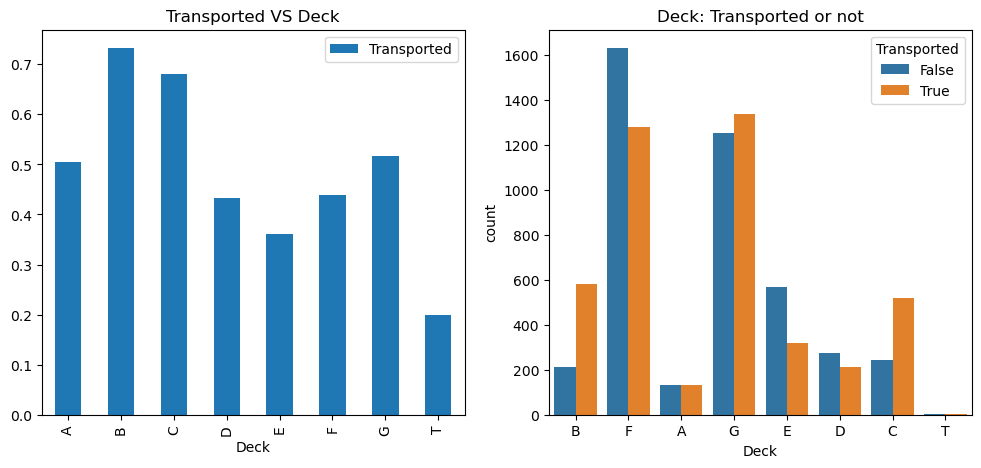

In [50]:
f, ax = plt.subplots(1,2,figsize=(12,5))

df[['Deck', 'Transported']].groupby(['Deck']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Transported VS Deck')
sns.countplot(x = 'Deck', hue = 'Transported', data = df, ax = ax[1])
ax[1].set_title('Deck: Transported or not')

# 갑판과 transported 사이의 관계

# 결과 해석

### 첫 번째 그래프
- B,C 에서 많이 실종

### 두 번째 그래프
- 

Text(0.5, 1.0, 'Side: Transported or not')

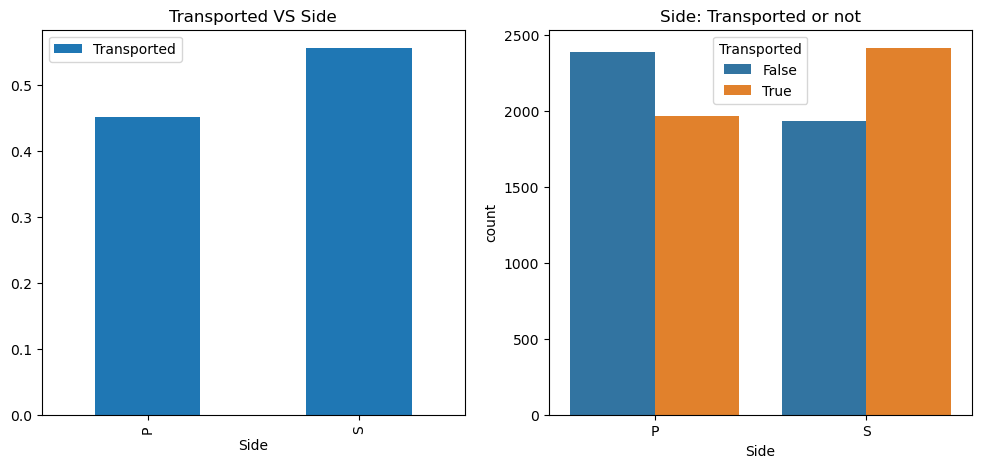

In [51]:
f, ax = plt.subplots(1,2,figsize=(12,5))

df[['Side', 'Transported']].groupby(['Side']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Transported VS Side')
sns.countplot(x = 'Side', hue = 'Transported', data = df, ax = ax[1])
ax[1].set_title('Side: Transported or not')

# 배의 좌편우편?과 transported 사이의 관계

# 결과 해석

### 첫 번째 그래프
- port(좌), starboard(우) 중 좌측 사람들 > 구조 상황에서 유리한 위치 선점

### 두 번째 그래프
- 마찬가지로 배의 좌측에 위치한 사람들이 구조 상황에서 유리

# Age

In [52]:
# 나이는 최빈값으로
mode_value = df['Age'].mode()[0]
df['Age'].fillna(mode_value, inplace=True)

# Destination

In [53]:
df[['Age', 'Destination']].groupby('Destination').mean().sort_values(by = 'Age')

,Age
Destination,
PSO J318.5-22,27.467337
TRAPPIST-1e,28.713271
55 Cancri e,29.205556


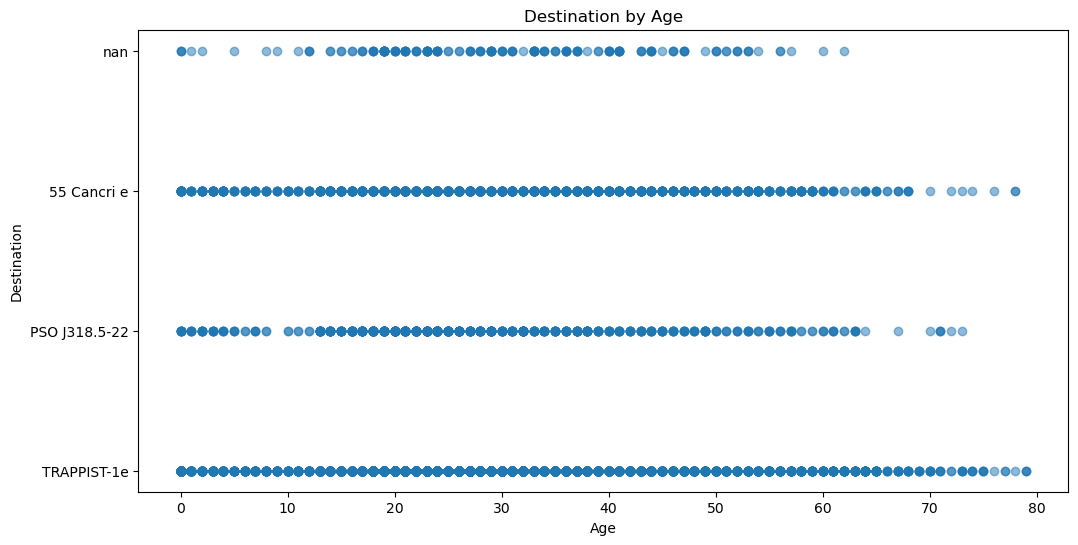

In [54]:
# 'Age'에 따른 'Destination' 분포 시각화
df['Destination1'] = df['Destination'].astype(str)
plt.figure(figsize=(12, 6))
plt.scatter(df['Age'], df['Destination1'], alpha=0.5)
plt.title('Destination by Age')
plt.xlabel('Age')
plt.ylabel('Destination')
plt.show()

In [55]:
np.min(df['Age'])

0.0

In [56]:
np.max(df['Age'])

79.0

In [57]:
df['NewAge'] = 0
for i in df.index:
    if (0<=df['Age'][i]) & (df['Age'][i]<10):
        df['NewAge'][i] = 'infant'
    elif (10<=df['Age'][i]) & (df['Age'][i]<20):
        df['NewAge'][i] = 'teen'
    elif (20<=df['Age'][i]) & (df['Age'][i]<30):
        df['NewAge'][i] = '20s'
    elif (30<=df['Age'][i]) & (df['Age'][i]<40):
        df['NewAge'][i] = '30s'
    elif (40<=df['Age'][i]) & (df['Age'][i]<50):
        df['NewAge'][i] = '40s'
    elif (50<=df['Age'][i]) & (df['Age'][i]<60):
        df['NewAge'][i] = '50s'
    elif (60<=df['Age'][i]) & (df['Age'][i]<70):
        df['NewAge'][i] = '60s'
    else:
        df['NewAge'][i] = '70s'
        

/var/folders/v1/3q6w8yln7rlf27jz14stsjxc0000gn/T/ipykernel_1420/3266117037.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NewAge'][i] = '30s'


<Figure size 1600x800 with 0 Axes>

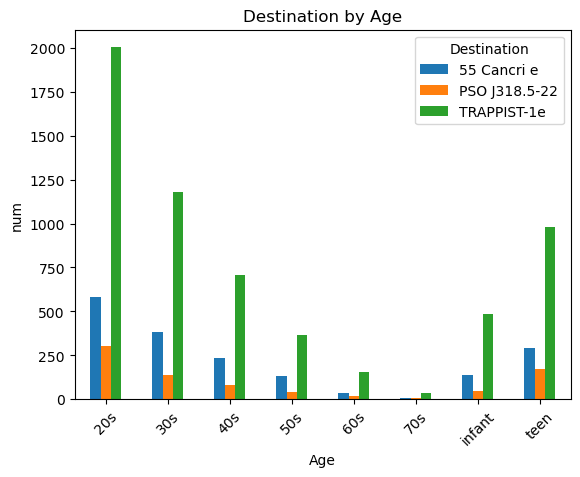

In [58]:
 # 'Age'에 따른 'Destination' 분포를 막대 그래프로 시각화
plt.figure(figsize=(16, 8))  # 그래프의 크기를 키움
data_grouped = df.groupby(['NewAge', 'Destination']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Destination by Age')
plt.xlabel('Age')
plt.ylabel('num')
plt.legend(title='Destination')
plt.xticks(rotation=45)  # x축 레이블을 45도로 회전
plt.show()

In [59]:
# 나이별 목적지에 대한 선호도는 딱히 없는 듯. 나이대별 destination 분포가 동일 
# 경제 상황으로 넘어가 보자

df[['VIP', 'Destination']].groupby('Destination').mean().sort_values(by = 'VIP')

,VIP
Destination,
TRAPPIST-1e,0.028233
PSO J318.5-22,0.031407
55 Cancri e,0.043889


<Figure size 1200x600 with 0 Axes>

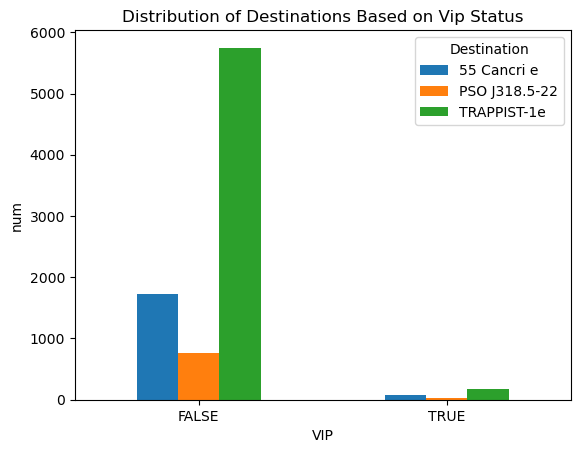

In [60]:
plt.figure(figsize=(12, 6))
data_grouped = df.groupby(['VIP', 'Destination']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Distribution of Destinations Based on Vip Status')
plt.xlabel('VIP')
plt.ylabel('num')
plt.legend(title='Destination')
plt.xticks([0, 1], ['FALSE', 'TRUE'], rotation=0)  # x축 레이블을 FALSE와 TRUE로 지정하고, 0도로 회전
plt.show()

# 나이와 마찬가지로 VIP의 여부와 관계없이 분포 동일

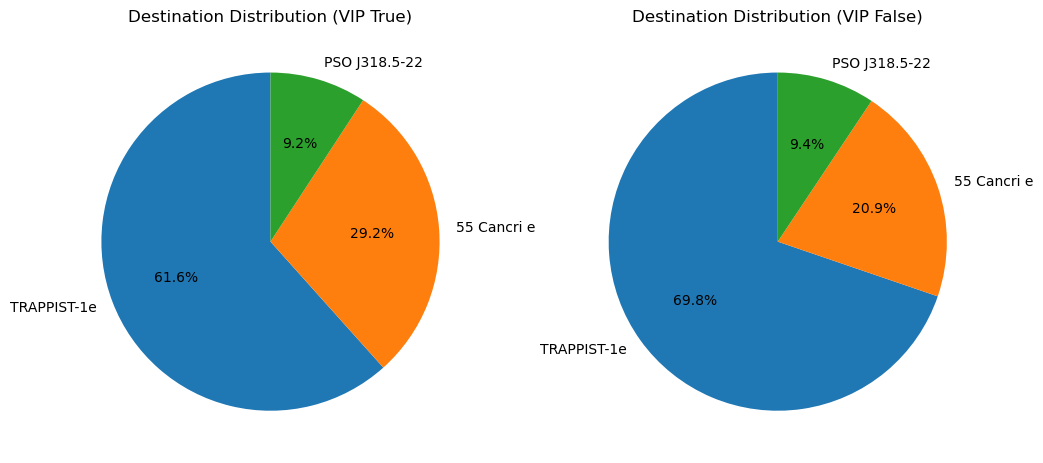

In [61]:
vip_destination = df[df['VIP'] == True]['Destination'].value_counts()

# 'VIP' 값이 False인 경우의 'Destination' 분포
nvip_destination = df[df['VIP'] == False]['Destination'].value_counts()

# 그래프를 그리기
plt.figure(figsize=(12, 6))

# 'VIP'가 True인 경우의 원그래프를 그리기
plt.subplot(1, 2, 1)
plt.pie(vip_destination, labels=vip_destination.index, autopct='%1.1f%%', startangle=90)
plt.title('Destination Distribution (VIP True)')

# 'VIP'가 False인 경우의 원그래프를 그리기
plt.subplot(1, 2, 2)
plt.pie(nvip_destination, labels=nvip_destination.index, autopct='%1.1f%%', startangle=90)
plt.title('Destination Distribution (VIP False)')

plt.show()

#결과적으로 봤을 때 Age나 VIP여부에 따른 Destination 분석은 그다지 유의미하지 않아보임.
#가장 많이 가는 행성은 그냥 정해져 있는 듯

In [62]:
mode_value = df['Destination'].mode()[0]
df['Destination'].fillna(mode_value, inplace=True)

# Name

In [63]:
# 'Name' 열을 분석하여 Given name과 Family name 분리
def split_name(name):
    if pd.isna(name):
        return [None, None]
    parts = name.split()
    if len(parts) > 1:
        return [' '.join(parts[:-1]), parts[-1]]  # 마지막 단어를 성으로, 나머지를 이름으로 처리
    else:
        return [None, name]  # 하나의 단어만 있는 경우 이를 성으로 간주

# 분리된 이름을 새로운 열에 할당
df[['Given', 'Family']] = df['Name'].apply(lambda x: split_name(x)).tolist()
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Group,Index,maxIndex,Deck,Side,Destination1,NewAge,Given,Family
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0001,01,01,B,P,TRAPPIST-1e,30s,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,0002,01,01,F,S,TRAPPIST-1e,20s,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,0003,01,02,A,S,TRAPPIST-1e,50s,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,0003,02,02,A,S,TRAPPIST-1e,30s,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,0004,01,01,F,S,TRAPPIST-1e,teen,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,Gravior Noxnuther,False,9276,01,01,A,P,55 Cancri e,40s,Gravior,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,Kurta Mondalley,False,9278,01,01,G,S,PSO J318.5-22,teen,Kurta,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,Fayey Connon,True,9279,01,01,G,S,TRAPPIST-1e,20s,Fayey,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,Celeon Hontichre,False,9280,01,02,E,S,55 Cancri e,30s,Celeon,Hontichre


In [64]:
# 각 Family 그룹의 인원 수를 계산
family_sizes = df.groupby('Family').size()
family_missing = df.groupby('Family')['Transported'].mean()
print(family_missing)

Family
Acobson        0.250000
Acobsond       0.333333
Adavisons      0.444444
Adkinson       0.000000
Admingried     0.750000
                 ...   
Wynneyerson    0.500000
Yanton         0.285714
Yatters        0.500000
Yorkland       0.636364
Youngrayes     0.333333
Name: Transported, Length: 2217, dtype: float64


In [65]:
# Family size와 생존률을 결합한 새로운 DataFrame 생성
combined_data = pd.DataFrame({'Size': family_sizes, 'MissingRate': family_missing})
combined_data

,Size,MissingRate
Family,,
Acobson,4,0.250000
Acobsond,3,0.333333
Adavisons,9,0.444444
Adkinson,3,0.000000
Admingried,4,0.750000
...,...,...
Wynneyerson,2,0.500000
Yanton,7,0.285714
Yatters,4,0.500000


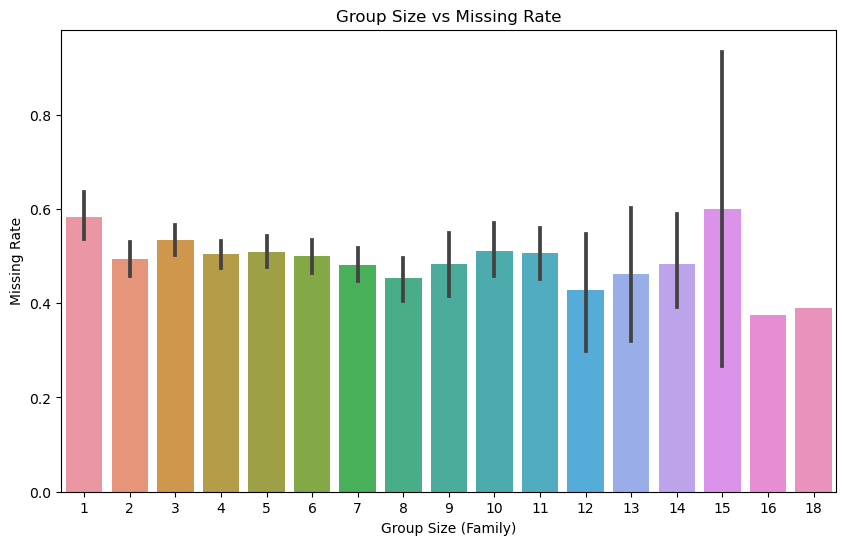

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_data, x='Size', y='MissingRate')
plt.title('Group Size vs Missing Rate')
plt.xlabel('Group Size (Family)')
plt.ylabel('Missing Rate')
plt.show()

In [67]:
# Family 별로 그룹화하여 그룹의 크기 계산
family_sizes = df.groupby('Family').size()

# 각 승객에 대해 해당하는 Family 크기를 새로운 열로 추가
df['FamilySize'] = df['Family'].map(family_sizes)

# 단일 승객 그룹과 다중 승객 그룹으로 분류
df['IsSingle'] = df['FamilySize'] == 1
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Group,Index,maxIndex,Deck,Side,Destination1,NewAge,Given,Family,FamilySize,IsSingle
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0001,01,01,B,P,TRAPPIST-1e,30s,Maham,Ofracculy,1.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,0002,01,01,F,S,TRAPPIST-1e,20s,Juanna,Vines,4.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,0003,01,02,A,S,TRAPPIST-1e,50s,Altark,Susent,6.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,0003,02,02,A,S,TRAPPIST-1e,30s,Solam,Susent,6.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,0004,01,01,F,S,TRAPPIST-1e,teen,Willy,Santantines,6.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,Gravior Noxnuther,False,9276,01,01,A,P,55 Cancri e,40s,Gravior,Noxnuther,3.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,Kurta Mondalley,False,9278,01,01,G,S,PSO J318.5-22,teen,Kurta,Mondalley,2.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,Fayey Connon,True,9279,01,01,G,S,TRAPPIST-1e,20s,Fayey,Connon,6.0,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,Celeon Hontichre,False,9280,01,02,E,S,55 Cancri e,30s,Celeon,Hontichre,6.0,False


In [68]:
# 그룹별 생존율 계산
missing_rates = df.groupby('IsSingle')['Transported'].mean()
missing_rates

# 가족 단위 크기로 봤을 때도, 싱글 여부로 따졌을 때도 구출 가능성에 큰 영향을 주는 변수는 아닌 것 같다 

IsSingle
False    0.49994
True     0.58377
Name: Transported, dtype: float64

In [69]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin            99
Destination       0
Age               0
VIP               0
Name            200
Transported       0
Group             0
Index             0
maxIndex          0
Deck              0
Side              0
Destination1      0
NewAge            0
Given           200
Family          200
FamilySize      200
IsSingle          0
dtype: int64

In [70]:
final_df = df.copy()

In [71]:
final_df.drop(labels = ['PassengerId', 'Destination1', 'NewAge', 'Group', 'Index', 'Family', 'FamilySize', 'Given', 'Name', 'Cabin'], axis = 1, inplace = True)

In [72]:
final_df.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
maxIndex       0
Deck           0
Side           0
IsSingle       0
dtype: int64

In [73]:
final_df

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,maxIndex,Deck,Side,IsSingle
0,Europa,False,TRAPPIST-1e,39.0,False,False,01,B,P,True
1,Earth,False,TRAPPIST-1e,24.0,False,True,01,F,S,False
2,Europa,False,TRAPPIST-1e,58.0,True,False,02,A,S,False
3,Europa,False,TRAPPIST-1e,33.0,False,False,02,A,S,False
4,Earth,False,TRAPPIST-1e,16.0,False,True,01,F,S,False
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,False,01,A,P,False
8689,Earth,True,PSO J318.5-22,18.0,False,False,01,G,S,False
8690,Earth,False,TRAPPIST-1e,26.0,False,True,01,G,S,False
8691,Europa,False,55 Cancri e,32.0,False,False,02,E,S,False


# 모델 build 후 성능 확인 (train.csv 내 데이터 활용)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [110]:
model_df = pd.get_dummies(final_df)

In [111]:
model_df['Transported'] = model_df['Transported'].astype(str)
model_df['Transported'] = model_df['Transported'].apply(lambda x: 0 if x == 'False' else 1)
model_df['IsSingle'] = model_df['IsSingle'].astype(str)
model_df['IsSingle'] = model_df['IsSingle'].apply(lambda x: 0 if x == 'False' else 1)

In [112]:
model_df

,Age,Transported,IsSingle,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,39.0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8689,18.0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
8690,26.0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8691,32.0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [113]:
x_data = model_df.loc[:, ~model_df.columns.isin(['Transported'])]
# 종속변수 필터링
y_data = model_df['Transported']

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
print('학습 데이터셋의 데이터 수 : ', len(X_train))
print('테스트 데이터셋의 데이터 수 : ', len(y_test))

학습 데이터셋의 데이터 수 :  6954
테스트 데이터셋의 데이터 수 :  1739


In [120]:
X_train

,Age,IsSingle,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
1597,26.0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2889,12.0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1680,28.0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4810,24.0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5461,12.0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,20.0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
7275,33.0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3158,49.0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
713,42.0,0,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [114]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print("계수: ", clf.coef_)
print("절편: ", clf.intercept_)

계수:  [[-0.01354116  0.27048439 -0.24032989  0.40084031  0.02763166 -0.95559152
   1.1437336   0.25908303 -0.04068582 -0.03025513  0.24587523 -0.05773315
  -0.0460033  -0.02287984  0.22492035  0.31239699  0.0050964   0.19999115
   0.04106645 -0.52644611 -0.26778337  0.33166432  0.42114008 -0.11542238
  -0.23000667  0.21695536 -0.10170093 -0.06670434 -0.1424905   0.33063258]]
절편:  [0.20743755]


/Users/yeon.ari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
y_predict = clf.predict(X_test)

In [116]:
print(confusion_matrix(y_test, y_predict))

[[693 171]
 [302 573]]


In [117]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       864
           1       0.77      0.65      0.71       875

    accuracy                           0.73      1739
   macro avg       0.73      0.73      0.73      1739
weighted avg       0.73      0.73      0.73      1739



In [119]:
accuracy = accuracy_score(y_test, y_predict)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)
print("Accuracy:", accuracy)
print('Precision  : %.3f' %precision[0])
print('Recall     : %.3f' %recall[0])
print('Specificyty: %.3f' %recall[1]) 
print('F1-Score   : %.3f' %fscore[0]) 

Accuracy: 0.7280046003450259
Precision  : 0.696
Recall     : 0.802
Specificyty: 0.655
F1-Score   : 0.746


# 모델 build 후 성능 확인 (test.csv 데이터 활용)

In [83]:
test_df = pd.read_csv('test.csv')

In [84]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [85]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [86]:
test_df[['Given', 'Family']] = test_df['Name'].apply(lambda x: split_name(x)).tolist()

In [87]:
family_sizes = test_df.groupby('Family').size()
test_df['FamilySize'] = test_df['Family'].map(family_sizes)
test_df['IsSingle'] = test_df['FamilySize'] == 1

In [88]:
test_df['HomePlanet'].fillna('Earth', inplace=True)

In [89]:
services = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for service in services:    
    test_df[service].fillna(test_df.groupby("VIP")[service].transform("mean"), inplace = True)

In [90]:
price

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,
False,217.218527,426.336536,173.876298,301.711045,282.718056
True,473.615385,1811.393782,247.726804,760.710660,1234.856410


In [91]:
for i in test_df.index:
    if pd.isna(test_df['VIP'][i]):  # 'VIP' 열이 결측치인 경우에만 실행
        is_vip = False  # 각 행에 대해 'is_vip' 플래그를 False로 초기화
        for service in services:
            if test_df[service][i] >= price[service][1]:
                is_vip = True  # 각 서비스 이용금액이 vip 고객들의 이용금액의 기준치(평균) 이상이라면
                break
        test_df.at[i, 'VIP'] = is_vip

test_df['VIP'].fillna(False, inplace=True)

In [92]:
for i in test_df.index:
    if pd.isna(test_df['CryoSleep'][i]):  # CryoSleep 열이 결측치인 경우에만 실행
        is_cryosleep = False 
        for j in test_df.index:
            if test_df['VIP'][j] != 'True':
                is_cryosleep = True 
                break
        test_df.at[i, 'CryoSleep'] = is_cryosleep 

In [93]:
group = []
index = []
maxIndex = []

for i in test_df['PassengerId']:
    group.append(i[0:4]) # gggg:그룹 식별자로 첫 네 문자 추출
    index.append(i[5:]) # pp: 다섯 번째 위치부터의 문자를 색인으로 사용

test_df['Group'] = group
test_df['Index'] = index
test_df['maxIndex'] = '01' # 'maxIndex' 열을 생성하고 초기값을 '01'로 설정

# '그룹'이 동일한 경우 'maxIndex' 값을 마지막 'Index' 값으로 변경
for unique_group in test_df['Group'].unique():
    group_indices = test_df[test_df['Group'] == unique_group].index
    last_index_in_group = group_indices[-1]
    test_df.loc[group_indices, 'maxIndex'] = test_df.at[last_index_in_group, 'Index']

In [94]:
for i in test_df[test_df['Cabin'].isna()].index:
    maxIndex = int(test_df.loc[i, 'maxIndex'])  # 'maxIndex' 컬럼이 존재한다고 가정
    if maxIndex >= 2:
        group = test_df.loc[i, 'Group']
        ndf = test_df[-test_df['Cabin'].isna()]
        cabin = ndf[group == ndf['Group']]['Cabin'].mode()
        if not cabin.empty:
            test_df.at[i, 'Cabin'] = cabin[0]
    else:
        continue

In [95]:
test_df['Deck'] = 0
test_df['Side'] = 0

for i in test_df[-test_df.Cabin.isna()].index:
    cont = str(test_df.Cabin[i])
    test_df.Deck[i] = cont[0]
    test_df.Side[i] = cont[-1]

for i in test_df[test_df.Cabin.isna()].index:
    test_df.Deck[i] = np.nan
    test_df.Side[i] = np.nan


/var/folders/v1/3q6w8yln7rlf27jz14stsjxc0000gn/T/ipykernel_1420/1646411442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.Deck[i] = cont[0]
/var/folders/v1/3q6w8yln7rlf27jz14stsjxc0000gn/T/ipykernel_1420/1646411442.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.Side[i] = cont[-1]
/var/folders/v1/3q6w8yln7rlf27jz14stsjxc0000gn/T/ipykernel_1420/1646411442.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test

In [96]:
test_df['Side'].value_counts()

S    2111
P    2103
Name: Side, dtype: int64

In [97]:
test_df['Deck'].fillna('F', inplace = True)
test_df['Side'].fillna('P', inplace = True)

In [98]:
test_df['Destination'].fillna('TRAPPIST-1e', inplace=True)

In [99]:
test_df['Age'].fillna(24, inplace=True)

In [100]:
test_df.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin           63
Destination      0
Age              0
VIP              0
RoomService      3
FoodCourt        1
ShoppingMall     1
Spa              2
VRDeck           1
Name            94
Given           94
Family          94
FamilySize      94
IsSingle         0
Group            0
Index            0
maxIndex         0
Deck             0
Side             0
dtype: int64

In [101]:
test_df.drop(labels = ['PassengerId', 'Given', 'Family', 'FamilySize', 'Group', 'Index', 'Name', 'Cabin', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1, inplace = True)

In [102]:
test_df.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
IsSingle       0
maxIndex       0
Deck           0
Side           0
dtype: int64

In [103]:
test_df = pd.get_dummies(test_df)
test_df['IsSingle'] = test_df['IsSingle'].astype(str)
test_df['IsSingle'] = test_df['IsSingle'].apply(lambda x: 0 if x == 'False' else 1)

In [104]:
x_data = test_df.loc[:]
y_predict = clf.predict(x_data)

In [105]:
y_predict

array([1, 0, 1, ..., 1, 0, 1])

In [106]:
len(y_predict)

4277

In [107]:
result = np.where(y_predict == 0, 0, 1)

In [108]:
sample_submission = pd.read_csv('sample_submission.csv')
preds=np.round(result).astype(bool)
sample_submission['Transported'] = preds
sample_submission.to_csv("submission.csv",index=False)
sample_submission.head()

# kaggle 업로드용 데이터 생성 > 72점

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
